In [ ]:
"""
Author: Benedikt Buhk 
Date: 2025-02-05
Description: verify the results of RASPA2 for the LJ (and Coulombic) potentials.
"""

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def LJ_12_6(r, sigma, epsilon):
    """Lennard-Jones 12-6 potential"""
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

In [4]:
# calculate the LJ parameters for the mixture with the Lorentz-Berthelot mixing rules

# solid-atom: C (carbon) (parameters from UFF as in force_field_mixing_rules.py)
sig1 = 3.4309
eps1 = 52.8435

# adsorbate-molecule/atom 'XX'
sig2 = 3.21
eps2 = 77.77

sigma = (sig1 + sig2) / 2   
epsilon = np.sqrt(eps1 * eps2)

In [7]:
def plot_lj_potential(d, sigma, epsilon):
    r = np.linspace(2.0, 12.0, 500)

    plt.figure(figsize=(10, 6))
    #for atom, color in zip(results.keys(), colors):
    print(f"sigma: {sigma}, epsilon: {epsilon}")
    plt.plot(r, LJ_12_6(r, sigma, epsilon))
    plt.plot(d, LJ_12_6(d, sigma, epsilon), "ro", label=f"r = {d:.2f} Å, LJ = {LJ_12_6(d, sigma, epsilon):.8f} K")
    plt.title("Lennard-Jones (6-12) Interaction Potential", fontsize=16)
    plt.xlabel("Distance (r) [Å]", fontsize=14)
    plt.ylabel("LJ Potential [K]", fontsize=14)
    plt.xlim(2.0, 12.0)
    plt.ylim(-100, 100)   
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

sigma: 3.32045, epsilon: 64.10646609352288


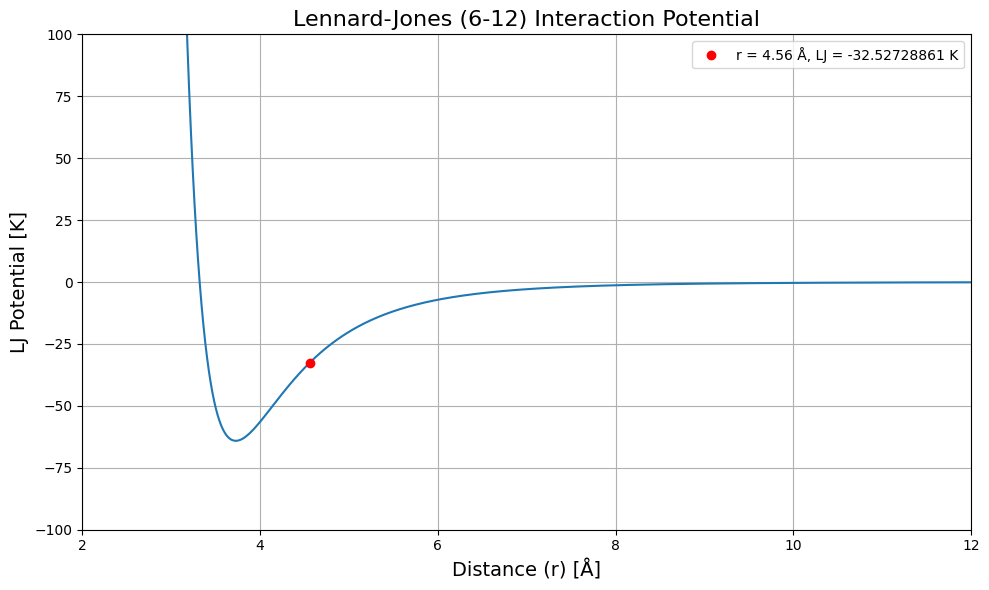

In [8]:
# plot the LJ potential
d = 4.56 # distance as in the RASPA2 simulation
plot_lj_potential(d, sigma, epsilon)

In [9]:
lj = LJ_12_6(d, sigma, epsilon)
print(f"lj: {lj:.8f} K")

lj: -32.52728861 K


So for the two atoms with the above LJ parameter we expect a LJ interaction energy of -32.52728861 K. This is also calculated with RASPA2 as you can see in the output file under Output/System0/ in line 632 (Host/Adsorbate VDW energy). (as the unitcell is very large and the LJ-cutoff is set to 20, there is only this single pair-interaction considered)

In [10]:
def coulombic_interaction(r: np.ndarray, charge1: float, charge2:float) -> np.ndarray: 
    """ 
     calculate the Coulombic interaction between a given atoms charge and C atom (charge = 0.7 e) at given distance r
     input: r: np.array, distance in Å
            charge1: float, charge in e
            charge2: float, charge in e
        output: 
        - Coulombic interaction: np.array  [K]
    """
    kb = 1.380648 * 10**-23  # J/K
    inv_4_epsi0 = 1 / (4 * np.pi * 8.8541878128 * 10**-12)  # C^2 / J m = C^2 s^2 / kg m^3
    charge_e_to_c = 1.602176634 * 10**-19  # C
    factor_coulomb = (
    inv_4_epsi0 * charge_e_to_c**2 / kb / 10**-10
    )  # 10**-10 to convert to Angstrom -> [K * Angstrom]
    return factor_coulomb * charge1 * charge2 / r

In [11]:
charge1 = 0.42
charge2 = 0.37

In [12]:
coulombic_interaction(4.56, charge1, charge2)

5694.628499162692

The single pair coulombic interaction is a bit tricky to reproduce as the Ewald Sum also considers the periodic replicas of the unitcell so this value for now just serves as a rough reference.